C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\art\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


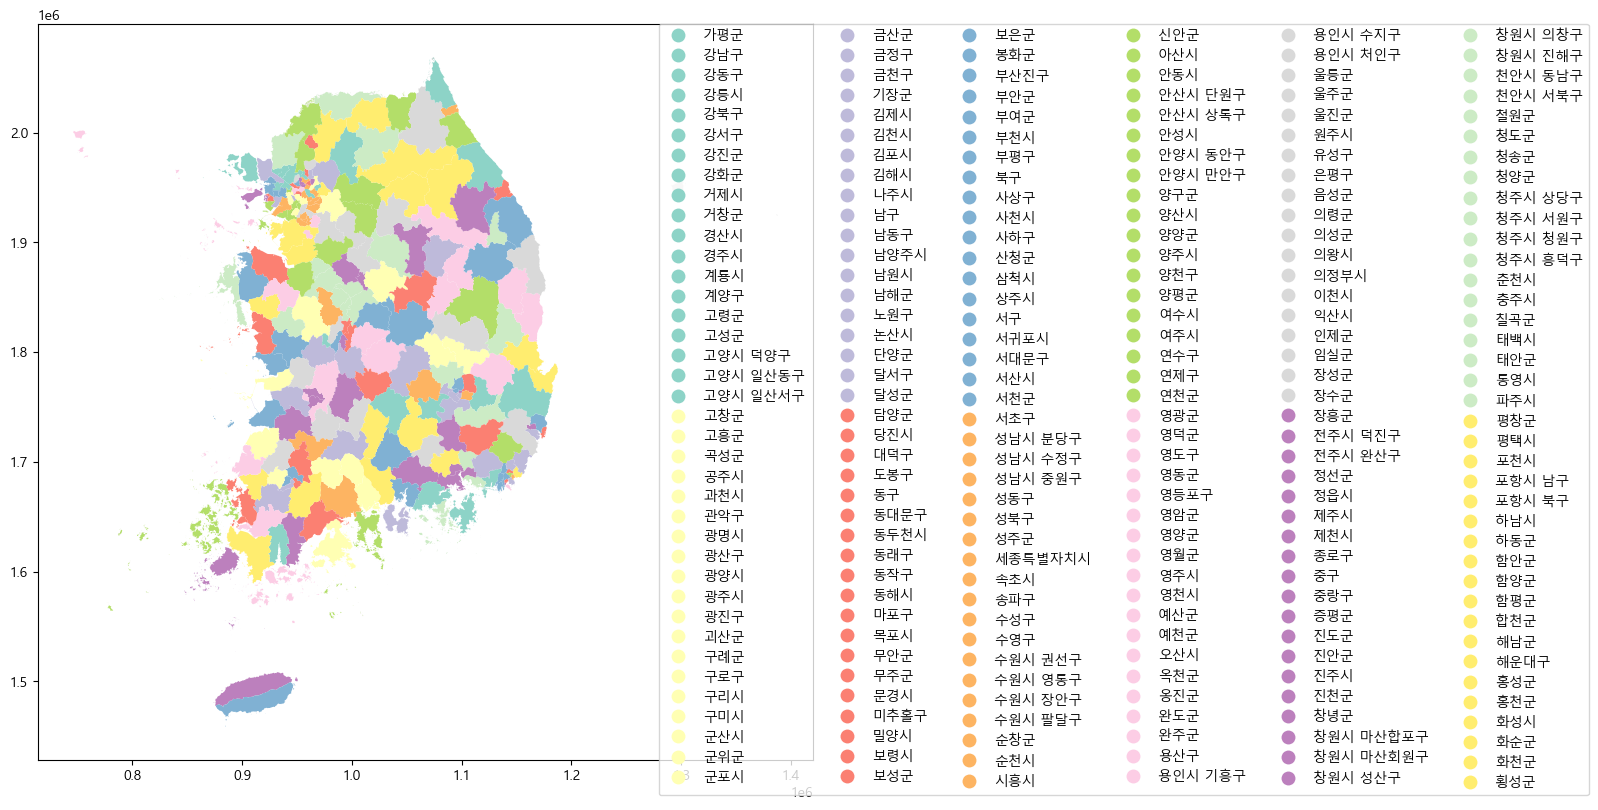

In [1]:
# geopandas와 matplotlib으로 시도. 2차 시도

import geopandas as gpd
import matplotlib.pyplot as plt
# Define file paths
shp_file = 'sig.shp'
dbf_file = 'sig.dbf'
shx_file = 'sig.shx'

# Load the shapefile
gdf = gpd.read_file(shp_file, encoding='euc-kr')


plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='SIG_KOR_NM', ax=ax, legend=True, legend_kwds={'bbox_to_anchor': (2.01, 1.01), 'ncol': 6}, cmap='Set3')

plt.show()

In [3]:
gdf 

SIG_CD    SIG_ENG_NM SIG_KOR_NM  \
0    11110     Jongno-gu        종로구   
1    11140       Jung-gu         중구   
2    11170    Yongsan-gu        용산구   
3    11200  Seongdong-gu        성동구   
4    11215   Gwangjin-gu        광진구   
..     ...           ...        ...   
245  51790  Hwacheon-gun        화천군   
246  51800    Yanggu-gun        양구군   
247  51810      Inje-gun        인제군   
248  51820   Goseong-gun        고성군   
249  51830  Yangyang-gun        양양군   

                                              geometry  
0    POLYGON ((956615.453 1953567.199, 956621.579 1...  
1    POLYGON ((957890.386 1952616.746, 957909.908 1...  
2    POLYGON ((953115.761 1950834.084, 953114.206 1...  
3    POLYGON ((959681.109 1952649.605, 959842.412 1...  
4    POLYGON ((964825.058 1952633.250, 964875.565 1...  
..                                                 ...  
245  POLYGON ((1027779.614 2032000.017, 1027951.841...  
246  MULTIPOLYGON (((1046391.747 2032451.649, 10463...  
247  POLYGON ((1041948.853 1995343.843, 1042054.076...  
248  MULTIPOLYGON (((1091705.056 2034023.203, 10917...  
249  MULTIPOLYGON (((1102146.292 2010704.587, 11021...  

[250 rows x 4 columns]

In [5]:
# import os
# import pandas as pd

# # 현재 디렉토리 내의 모든 파일을 검색
# for filename in os.listdir('.'):
#     # 만약 파일이 엑셀 파일인 경우
#     if filename.endswith('.xlsx'):
#         # 엑셀 파일을 읽음
#         df = pd.read_excel(filename)
#         # 새로운 파일명을 생성 (확장자를 .csv로 변경)
#         new_filename = filename.replace('.xlsx', '.csv')
#         # DataFrame을 csv 파일로 저장
#         df.to_csv(new_filename, encoding='cp949')


In [13]:
import pandas as pd

law_city_codes = pd.read_csv('법정동코드_시군구.csv', encoding='cp949')


In [14]:
for i in range(5):  # cluster00.csv 부터 cluster04.csv 까지
    cluster = pd.read_csv(f'cluster0{i}.csv', encoding='cp949')
    
    # '지역'이 '시군구'와 일치하는 '법정동코드'를 찾아 'SIG_CD' column에 추가
    cluster['SIG_CD'] = cluster['지역'].map(law_city_codes.set_index('시군구')['법정동코드'])

    # CSV 파일로 저장
    cluster.to_csv(f'cluster0{i}_new.csv', index=False, encoding='cp949')


In [18]:

import geopandas as gpd
import matplotlib.pyplot as plt

shp_file = './sig_20230729/sig.shp'
gdf = gpd.read_file(shp_file, encoding='euc-kr')
gdf

SIG_CD    SIG_ENG_NM SIG_KOR_NM  \
0    11110     Jongno-gu        종로구   
1    11140       Jung-gu         중구   
2    11170    Yongsan-gu        용산구   
3    11200  Seongdong-gu        성동구   
4    11215   Gwangjin-gu        광진구   
..     ...           ...        ...   
245  51790  Hwacheon-gun        화천군   
246  51800    Yanggu-gun        양구군   
247  51810      Inje-gun        인제군   
248  51820   Goseong-gun        고성군   
249  51830  Yangyang-gun        양양군   

                                              geometry  
0    POLYGON ((956615.453 1953567.199, 956621.579 1...  
1    POLYGON ((957890.386 1952616.746, 957909.908 1...  
2    POLYGON ((953115.761 1950834.084, 953114.206 1...  
3    POLYGON ((959681.109 1952649.605, 959842.412 1...  
4    POLYGON ((964825.058 1952633.250, 964875.565 1...  
..                                                 ...  
245  POLYGON ((1027779.614 2032000.017, 1027951.841...  
246  MULTIPOLYGON (((1046391.747 2032451.649, 10463...  
247  POLYGON ((1041948.853 1995343.843, 1042054.076...  
248  MULTIPOLYGON (((1091705.056 2034023.203, 10917...  
249  MULTIPOLYGON (((1102146.292 2010704.587, 11021...  

[250 rows x 4 columns]

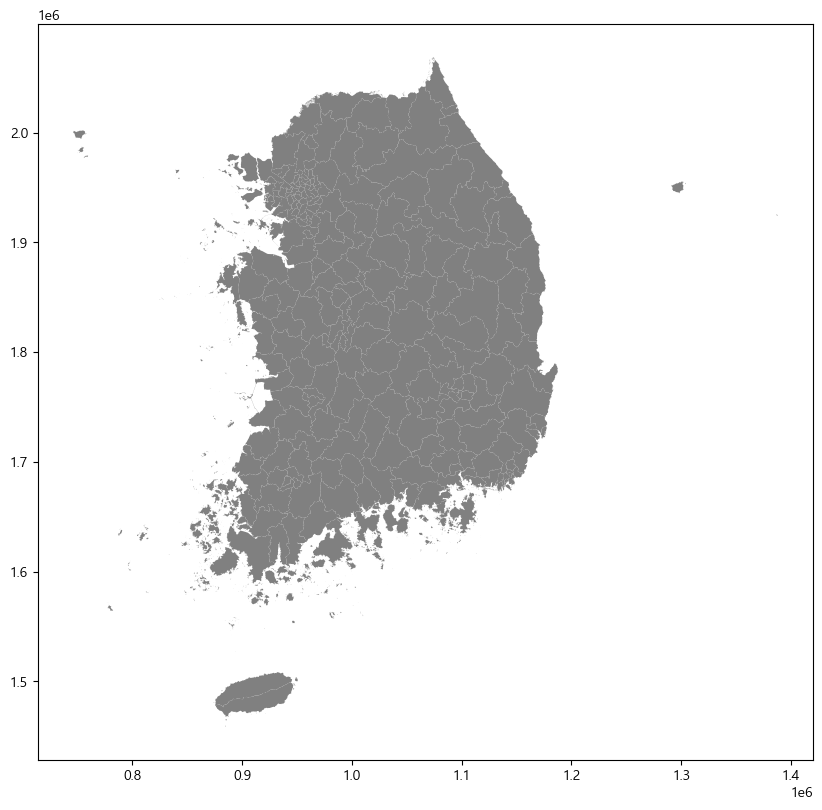

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Define color map
color_map = {
    'cluster00': 'red',
    'cluster01': 'blue',
    'cluster02': 'green',
    'cluster03': 'purple',
    'cluster04': 'orange',
}

# Define file paths
shp_file = './sig_20230729/sig.shp'

# Load the shapefile
gdf = gpd.read_file(shp_file, encoding='euc-kr')

# Load each cluster file and add the color to the geodataframe
for i in range(5):
    cluster = pd.read_csv(f'cluster0{i}.csv', encoding='cp949')
    gdf.loc[gdf['SIG_CD'].isin(cluster['SIG_CD']), 'color'] = color_map[f'cluster0{i}']

# Assign gray color to the regions that do not belong to any cluster
gdf['color'].fillna('gray', inplace=True)
    
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the geodataframe with colors assigned to each cluster
gdf.plot(color=gdf['color'], ax=ax)

plt.show()


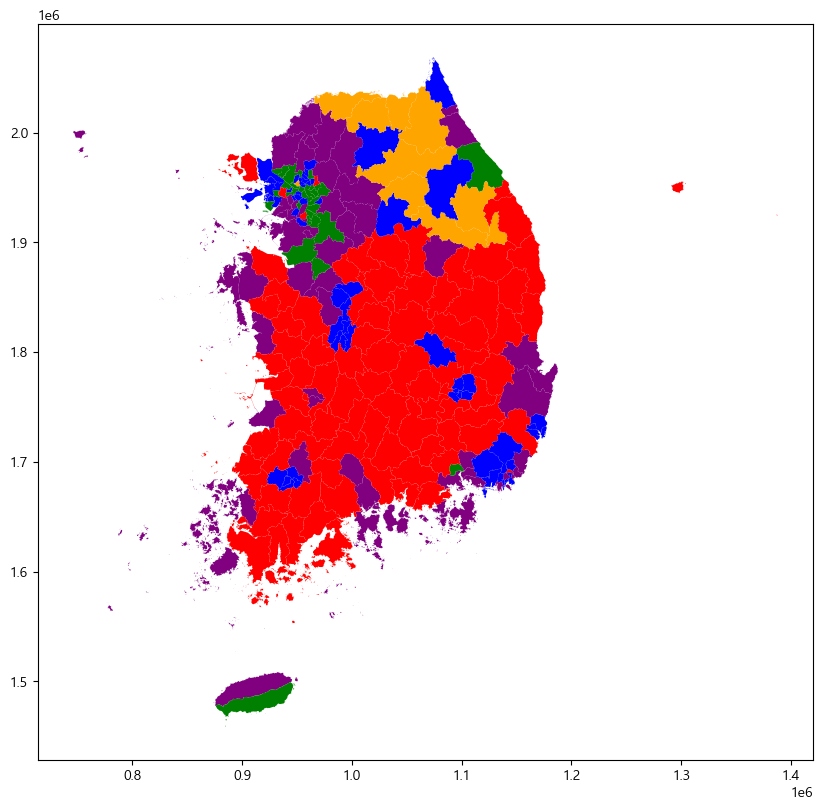

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Define color map
color_map = {
    'cluster00': 'red',
    'cluster01': 'blue',
    'cluster02': 'green',
    'cluster03': 'purple',
    'cluster04': 'orange',
}

# Define file paths
shp_file = './sig_20230729/sig.shp'

# Load the shapefile
gdf = gpd.read_file(shp_file, encoding='euc-kr')

# Convert 'SIG_CD' to string
gdf['SIG_CD'] = gdf['SIG_CD'].astype(str)

# Load each cluster file and add the color to the geodataframe
for i in range(5):
    cluster = pd.read_csv(f'cluster0{i}.csv', encoding='cp949')
    cluster['SIG_CD'] = cluster['SIG_CD'].astype(str)
    gdf.loc[gdf['SIG_CD'].isin(cluster['SIG_CD']), 'color'] = color_map[f'cluster0{i}']

# Assign gray color to the regions that do not belong to any cluster
gdf['color'].fillna('gray', inplace=True)

plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the geodataframe with colors assigned to each cluster
gdf.plot(color=gdf['color'], ax=ax)

plt.show()


In [25]:
import geopandas as gpd
shp_file = './sig_20230729/sig.shp'

# Load the shapefile
gdf = gpd.read_file(shp_file, encoding='euc-kr')

# Convert 'SIG_CD' to string
gdf['SIG_CD'] = gdf['SIG_CD'].astype(str)

# Check if the given SIG_CDs are in the shapefile
sig_cd_list = ['42800', '42750', '42810', '42770', '42780', '42190', '42720', '42790', '42730', '11410']

gdf[gdf['SIG_CD'].isin(sig_cd_list)]


SIG_CD    SIG_ENG_NM SIG_KOR_NM  \
12  11410  Seodaemun-gu       서대문구   

                                             geometry  
12  POLYGON ((951688.107 1956065.481, 951687.602 1...

In [28]:
# Check if the given SIG_KOR_NM are in the shapefile
sig_kor_nm_list = ['양구군', '영월군', '인제군', '정선군', '철원군', '태백시','홍천군','화천군','횡성군','속초시','양양군','강릉시','고성군','원주시','춘천시','평창군','동해시','삼척시']


gdf[gdf['SIG_KOR_NM'].isin(sig_kor_nm_list)]

SIG_CD       SIG_ENG_NM SIG_KOR_NM  \
223  48820      Goseong-gun        고성군   
232  51110     Chuncheon-si        춘천시   
233  51130         Wonju-si        원주시   
234  51150     Gangneung-si        강릉시   
235  51170       Donghae-si        동해시   
236  51190       Taebaek-si        태백시   
237  51210        Sokcho-si        속초시   
238  51230      Samcheok-si        삼척시   
239  51720    Hongcheon-gun        홍천군   
240  51730   Hoengseong-gun        횡성군   
241  51750     Yeongwol-gun        영월군   
242  51760  Pyeongchang-gun        평창군   
243  51770    Jeongseon-gun        정선군   
244  51780     Cheorwon-gun        철원군   
245  51790     Hwacheon-gun        화천군   
246  51800       Yanggu-gun        양구군   
247  51810         Inje-gun        인제군   
248  51820      Goseong-gun        고성군   
249  51830     Yangyang-gun        양양군   

                                              geometry color  
223  MULTIPOLYGON (((1067900.493 1654036.440, 10678...   red  
232  POLYGON ((1007462.095 2008948.792, 1007512.150...  gray  
233  POLYGON ((1038519.196 1944888.174, 1038552.691...  gray  
234  MULTIPOLYGON (((1136545.803 1962251.161, 11365...  gray  
235  MULTIPOLYGON (((1140184.975 1956251.627, 11401...  gray  
236  POLYGON ((1133987.168 1927444.971, 1133980.895...  gray  
237  MULTIPOLYGON (((1097565.776 2022623.133, 10975...  gray  
238  MULTIPOLYGON (((1158822.812 1924922.029, 11588...  gray  
239  POLYGON ((1046324.015 1994003.079, 1046427.876...  gray  
240  POLYGON ((1022931.707 1944049.288, 1022936.092...  gray  
241  POLYGON ((1068342.969 1934678.331, 1068367.270...  gray  
242  POLYGON ((1108660.341 1961857.507, 1108708.907...  gray  
243  POLYGON ((1089018.153 1935744.412, 1089041.604...  gray  
244  MULTIPOLYGON (((1007667.677 2037405.220, 10076...  gray  
245  POLYGON ((1027779.614 2032000.017, 1027951.841...  gray  
246  MULTIPOLYGON (((1046391.747 2032451.649, 10463...  gray  
247  POLYGON ((1041948.853 1995343.843, 1042054.076...  gray  
248  MULTIPOLYGON (((1091705.056 2034023.203, 10917...  gray  
249  MULTIPOLYGON (((1102146.292 2010704.587, 11021...  gray

In [36]:
print(gdf[gdf['color']=='gray'])

    SIG_CD   SIG_ENG_NM SIG_KOR_NM  \
248  51820  Goseong-gun        고성군   

                                              geometry color  
248  MULTIPOLYGON (((1091705.056 2034023.203, 10917...  gray  


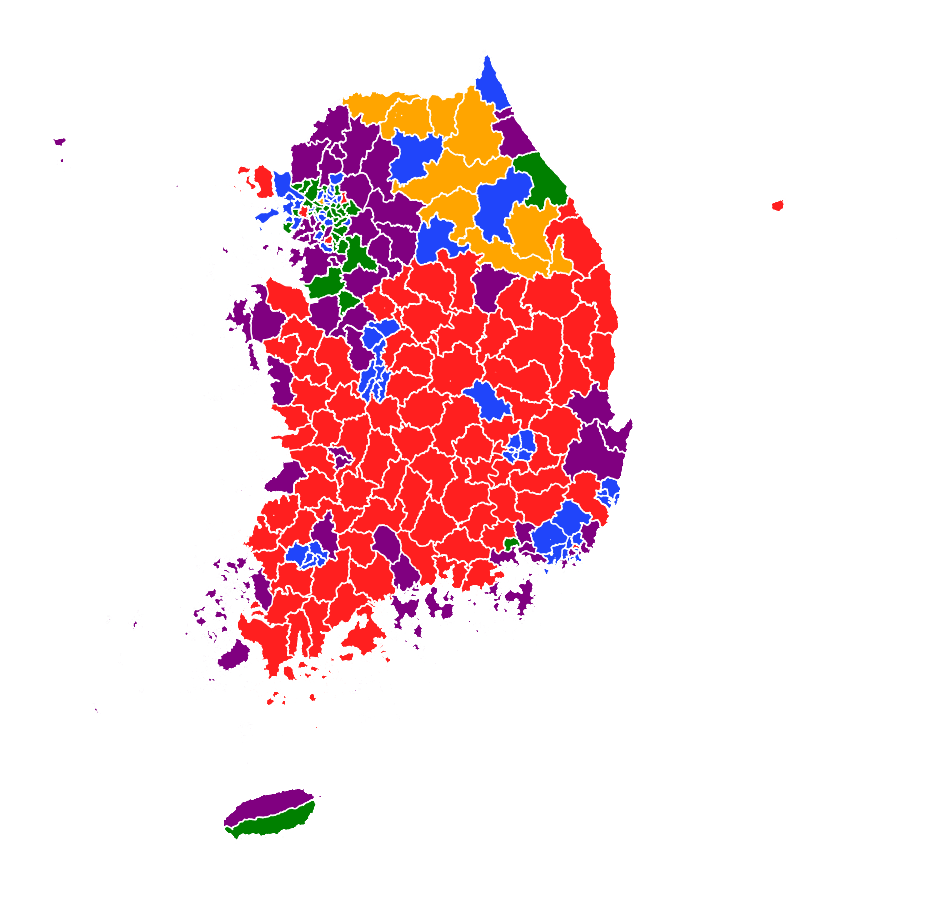

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Define color map
color_map = {
    'cluster00': '#ff1f1f',  # Light red
    'cluster01': '#2045fa',  # Light blue
    'cluster02': 'green',
    'cluster03': 'purple',
    'cluster04': 'orange',
}

# Define file paths
shp_file = './sig_20230729/sig.shp'

# Load the shapefile
gdf = gpd.read_file(shp_file, encoding='euc-kr')

# Convert 'SIG_CD' to string
gdf['SIG_CD'] = gdf['SIG_CD'].astype(str)

# Load each cluster file and add the color to the geodataframe
for i in range(5):
    cluster = pd.read_csv(f'cluster0{i}.csv', encoding='cp949')
    cluster['SIG_CD'] = cluster['SIG_CD'].astype(str)
    gdf.loc[gdf['SIG_CD'].isin(cluster['SIG_CD']), 'color'] = color_map[f'cluster0{i}']

# Assign gray color to the regions that do not belong to any cluster
gdf['color'].fillna('gray', inplace=True)

plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(1, 1, figsize=(12, 12))  # Increase the figure size

# Plot the geodataframe with colors assigned to each cluster
gdf.plot(color=gdf['color'], ax=ax, edgecolor='white')  # Add white edge color

# Hide axes and borders
ax.axis('off')
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()


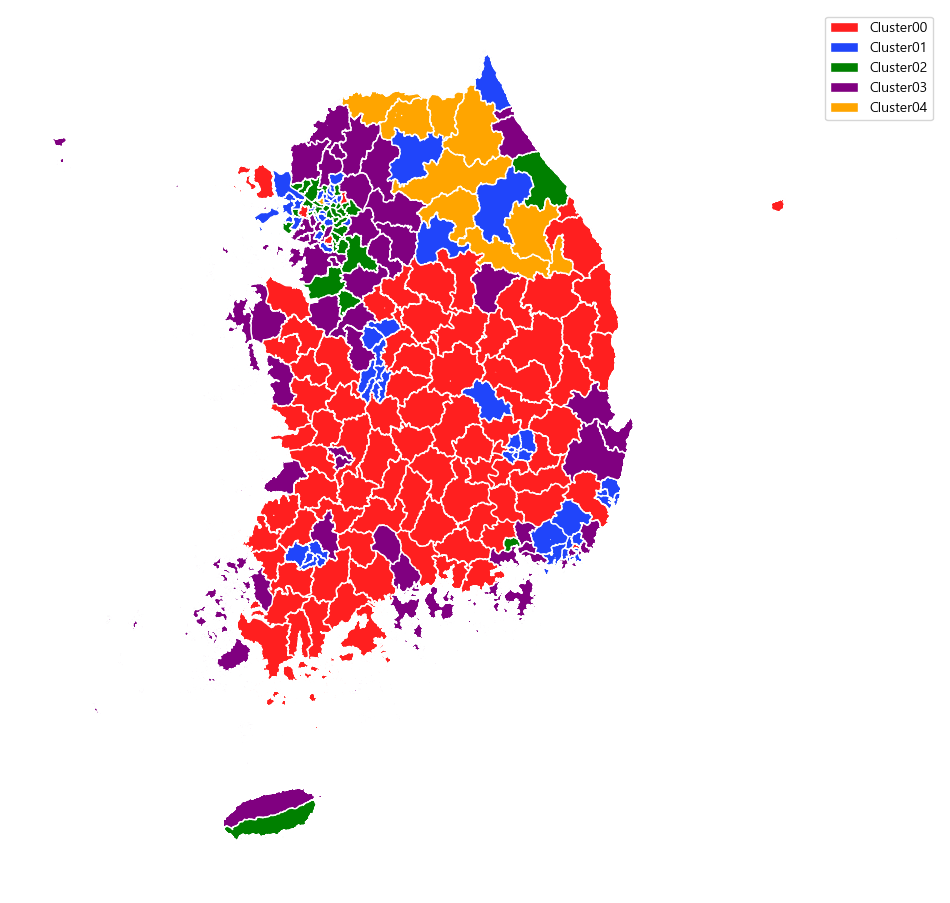

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Define color map
color_map = {
    'cluster00': '#ff1f1f',  # Light red
    'cluster01': '#2045fa',  # Light blue
    'cluster02': 'green',
    'cluster03': 'purple',
    'cluster04': 'orange',
}

# Define file paths
shp_file = './sig_20230729/sig.shp'

# Load the shapefile
gdf = gpd.read_file(shp_file, encoding='euc-kr')

# Convert 'SIG_CD' to string
gdf['SIG_CD'] = gdf['SIG_CD'].astype(str)

# Load each cluster file and add the color to the geodataframe
for i in range(5):
    cluster = pd.read_csv(f'cluster0{i}.csv', encoding='cp949')
    cluster['SIG_CD'] = cluster['SIG_CD'].astype(str)
    gdf.loc[gdf['SIG_CD'].isin(cluster['SIG_CD']), 'color'] = color_map[f'cluster0{i}']

# Assign gray color to the regions that do not belong to any cluster
gdf['color'].fillna('gray', inplace=True)

plt.rcParams['font.family'] = 'Malgun Gothic'

fig, ax = plt.subplots(1, 1, figsize=(12, 12))  # Increase the figure size

# Plot the geodataframe with colors assigned to each cluster
gdf.plot(color=gdf['color'], ax=ax, edgecolor='white')  # Add white edge color

# Hide axes and borders
ax.axis('off')
for spine in ax.spines.values():
    spine.set_visible(False)

# Define legend elements
legend_elements = [Patch(facecolor=color_map[f'cluster0{i}'], edgecolor='white', label=f'Cluster0{i}') for i in range(5)]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right')

# Save the figure
plt.savefig('result_of_clustering.png')

plt.show()


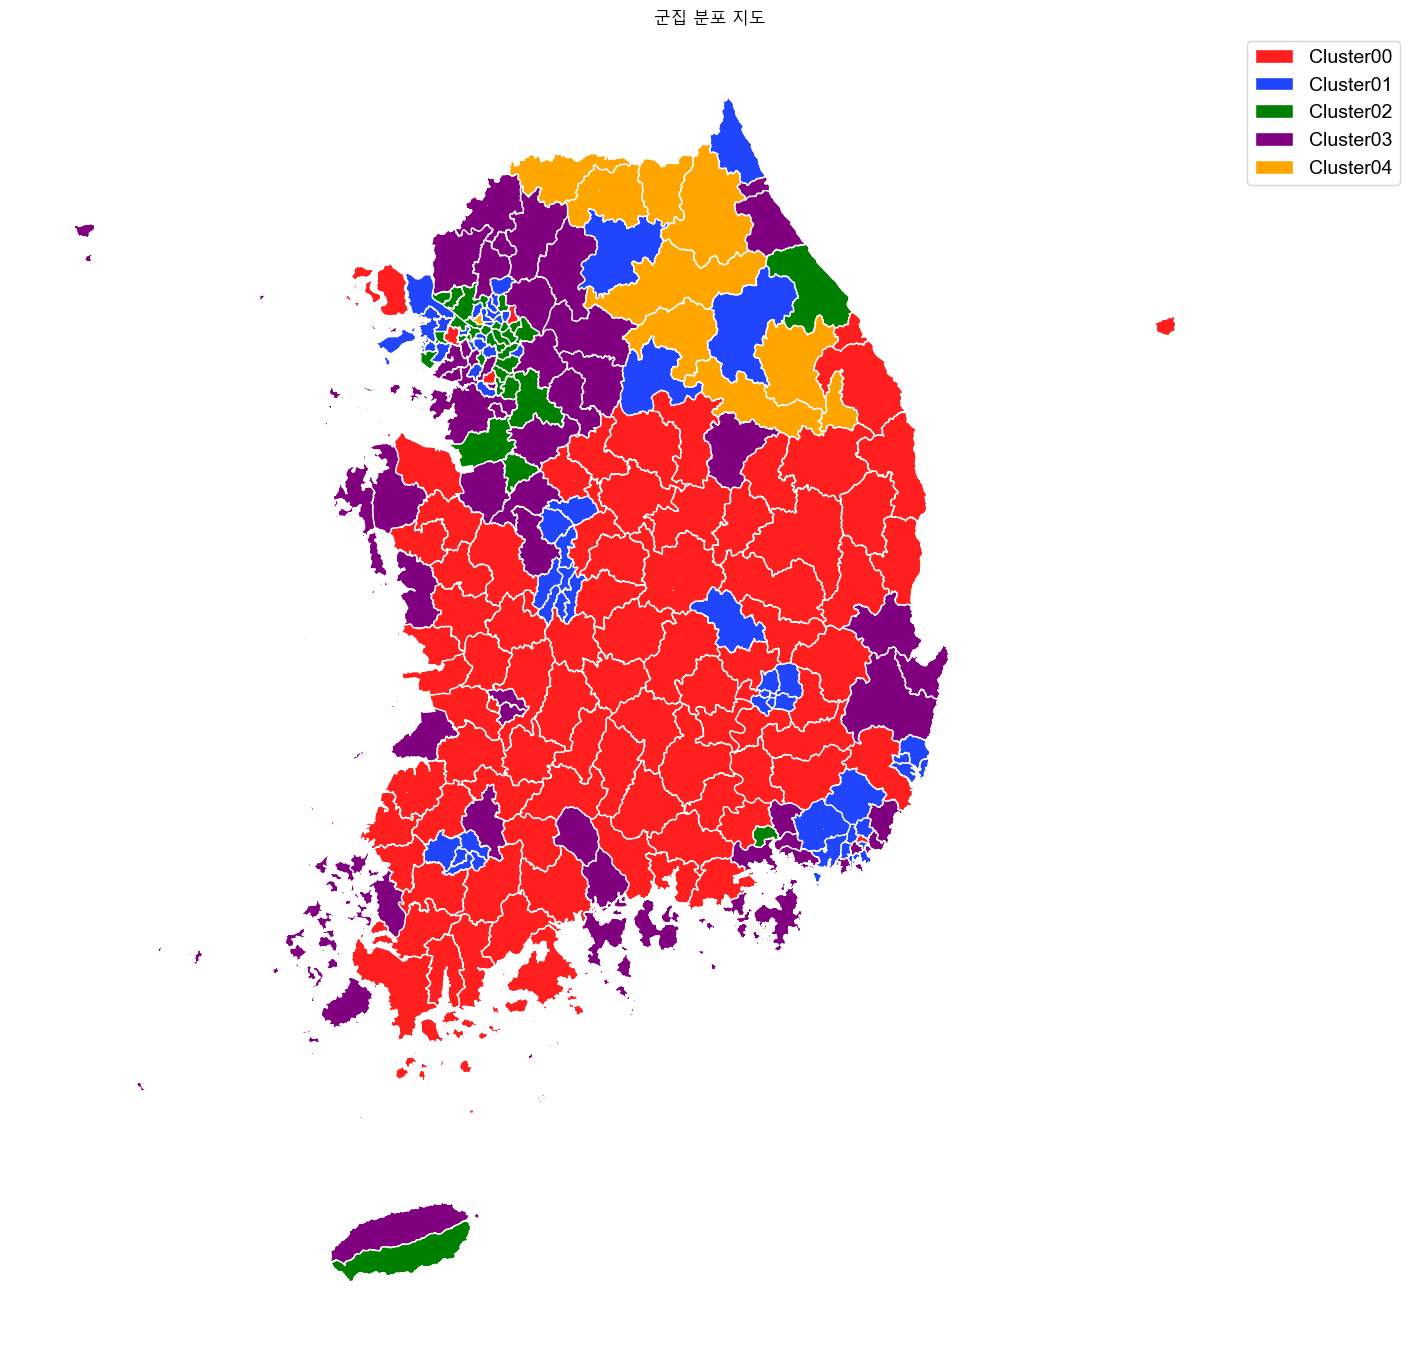

In [69]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()


# Define color map
color_map = {
    'cluster00': '#ff1f1f',  # Light red
    'cluster01': '#2045fa',  # Light blue
    'cluster02': 'green',
    'cluster03': 'purple',
    'cluster04': 'orange',
}

# Define file paths
shp_file = './sig_20230729/sig.shp'

# Load the shapefile
gdf = gpd.read_file(shp_file, encoding='euc-kr')

# Convert 'SIG_CD' to string
gdf['SIG_CD'] = gdf['SIG_CD'].astype(str)

# Load each cluster file and add the color to the geodataframe
for i in range(5):
    cluster = pd.read_csv(f'cluster0{i}.csv', encoding='cp949')
    cluster['SIG_CD'] = cluster['SIG_CD'].astype(str)
    gdf.loc[gdf['SIG_CD'].isin(cluster['SIG_CD']), 'color'] = color_map[f'cluster0{i}']

# Assign gray color to the regions that do not belong to any cluster
gdf['color'].fillna('gray', inplace=True)

#plt.rcParams['font.family'] = 'Arial'
rc('font', family='Malgun Gothic')

fig, ax = plt.subplots(1, 1, figsize=(14, 14))  # Increase the figure size

# Plot the geodataframe with colors assigned to each cluster
gdf.plot(color=gdf['color'], ax=ax, edgecolor='white')  # Add white edge color

# Hide axes and borders
ax.axis('off')
for spine in ax.spines.values():
    spine.set_visible(False)

# Define font properties for the legend
font = FontProperties()
font.set_family('serif')
font.set_name('Arial')
font.set_size(14)
    
# Define legend elements
legend_elements = [Patch(facecolor=color_map[f'cluster0{i}'], edgecolor='white', label=f'Cluster0{i}') for i in range(5)]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1), prop=font)

# Adjust the plot margins
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.title('군집 분포 지도')

# Save the figure
plt.savefig('result_of_clustering.png', bbox_inches='tight')

plt.show()
